# Netflix Stock Market Analysis

All the real-time data generated from yahoo webservice for stock price of netflix using variables: opening and closing, Hihg and low , Volume, Adj Close. All the data are indexed by the Date with date time format so that we can properly shape the data visualisation throughout the plots and graphs. All the data are sitiated within the 2012 to 2022 timeline.      

In [1]:
import pandas_datareader.data as web
import datetime

In [2]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2022,1,1)

In [3]:
netflix = web.DataReader("NFLX",'yahoo',start, end)
netflix.head(20)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,10.388571,10.018571,10.040000,10.320000,29213800.0,10.320000
2012-01-04,11.567143,10.258571,10.335714,11.492857,100489900.0,11.492857
2012-01-05,11.694286,11.040000,11.345714,11.328571,86552900.0,11.328571
2012-01-06,12.471429,11.242857,11.302857,12.327143,125610800.0,12.327143
2012-01-09,14.235714,12.448571,12.801429,14.025714,214073300.0,14.025714
2012-01-10,14.262857,13.214286,14.257143,13.690000,146335000.0,13.690000
2012-01-11,13.657143,13.064286,13.570000,13.164286,87148600.0,13.164286
2012-01-12,13.338571,12.742857,13.211429,13.164286,61243000.0,13.164286
2012-01-13,13.792857,12.885714,13.067143,13.482857,88839100.0,13.482857


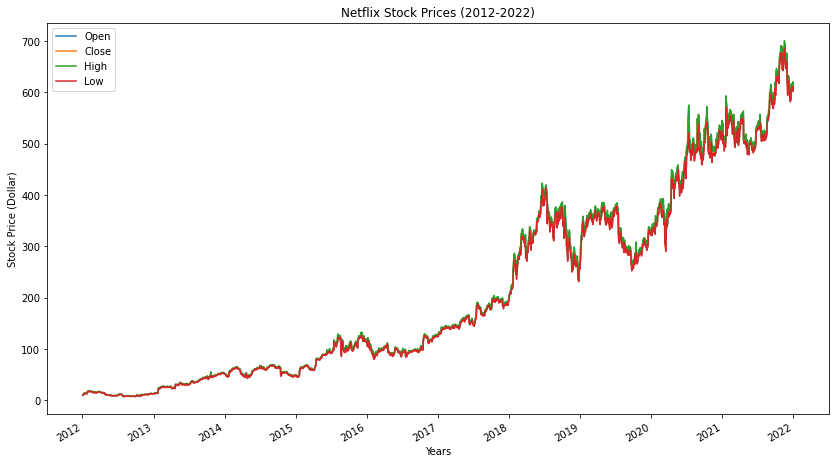

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(14,8))
netflix["Open"].plot()
netflix["Close"].plot()
netflix["High"].plot()
netflix["Low"].plot()
plt.title("Netflix Stock Prices (2012-2022)")
plt.xlabel("Years")
plt.ylabel("Stock Price (Dollar)")
plt.legend()
plt.show()

<AxesSubplot:xlabel='Date'>

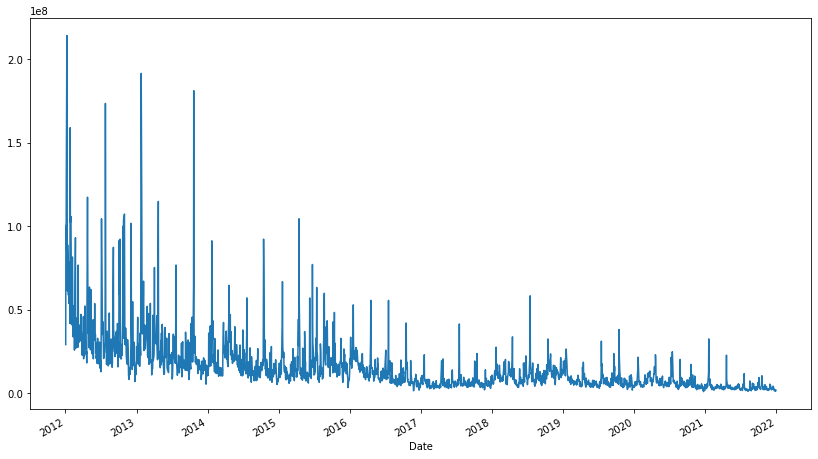

In [5]:
netflix["Volume"].plot(figsize=(14,8))

In [6]:
netflix["total_trade"] = netflix["Open"] * netflix["Volume"]

<AxesSubplot:xlabel='Date'>

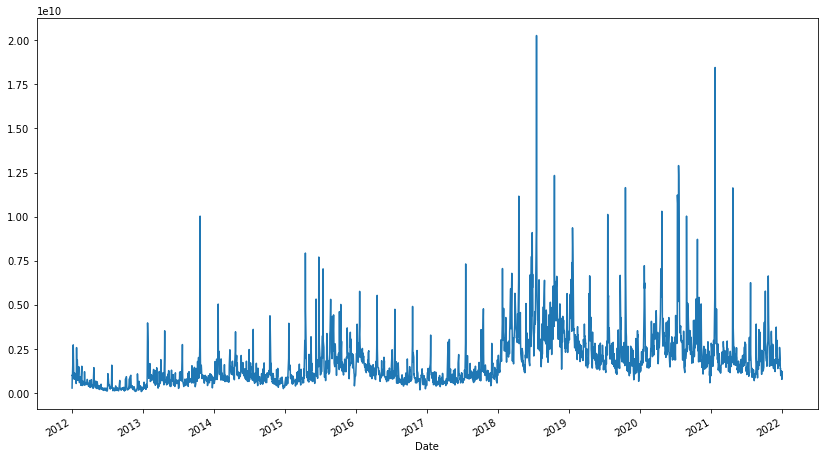

In [7]:
netflix["total_trade"].plot(figsize=(14,8))

<AxesSubplot:xlabel='Date'>

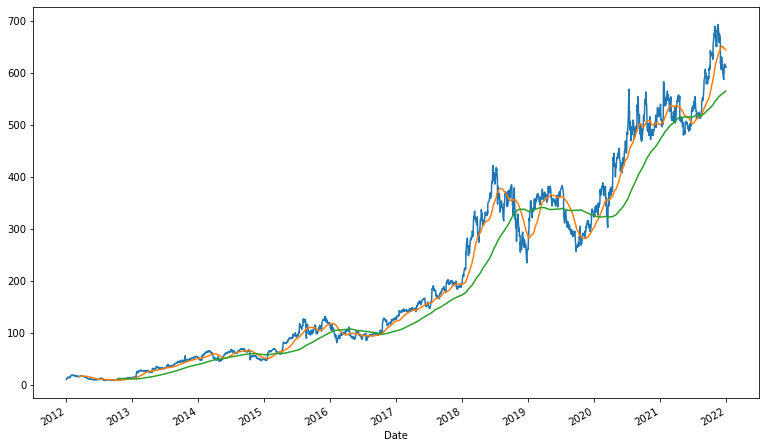

In [8]:
netflix["Open"].plot(figsize=(13,8))
netflix["MA50"] = netflix["Open"].rolling(50).mean()
netflix["MA200"] = netflix["Open"].rolling(200).mean()
netflix["MA50"].plot(label= "Moving Average 50")
netflix["MA200"].plot(label= "Moving Average 200" )

# Daily Return Rate

In [9]:
netflix["Returns"] = (netflix["Close"]/netflix["Close"].shift(1)) - 1

In [10]:
netflix["Returns"].head(20)

Date
2012-01-03         NaN
2012-01-04    0.113649
2012-01-05   -0.014295
2012-01-06    0.088146
2012-01-09    0.137791
2012-01-10   -0.023936
2012-01-11   -0.038401
2012-01-12    0.000000
2012-01-13    0.024200
2012-01-17    0.003603
2012-01-18    0.040329
2012-01-19    0.049929
2012-01-20   -0.031123
2012-01-23   -0.062650
2012-01-24   -0.013729
2012-01-25    0.025575
2012-01-26    0.220644
2012-01-27    0.067063
2012-01-30    0.013248
2012-01-31   -0.041697
Name: Returns, dtype: float64

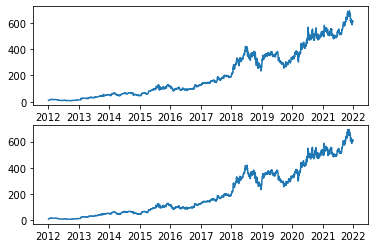

In [16]:
fig, ax = plt.subplots(2,1, sharey=True)
ax[0].plot(netflix["Open"])
ax[1].plot(netflix["Close"])

<AxesSubplot:ylabel='Density'>

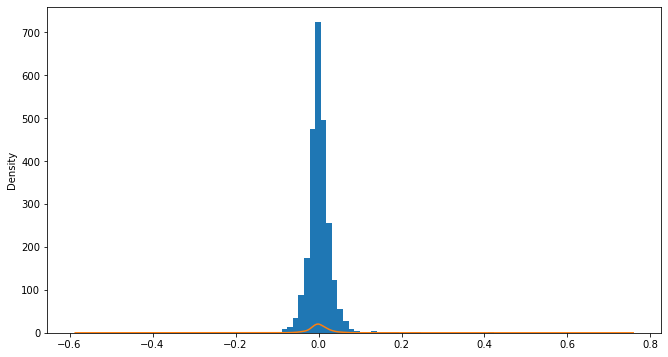

In [17]:
netflix["Returns"].hist(figsize=(11,6), bins=50, label="Netflix Returns From Market (Dollar)")
netflix["Returns"].plot(figsize=(11,6),label="Netflix Returns From Market (Dollar)", kind='kde')

<AxesSubplot:>

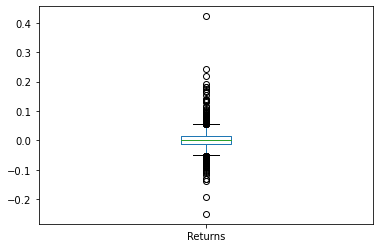

In [18]:
netflix["Returns"].plot(kind='box')

In [19]:
netflix["cum_return"] = (1 + netflix["Returns"] ).cumprod()

<AxesSubplot:xlabel='Date'>

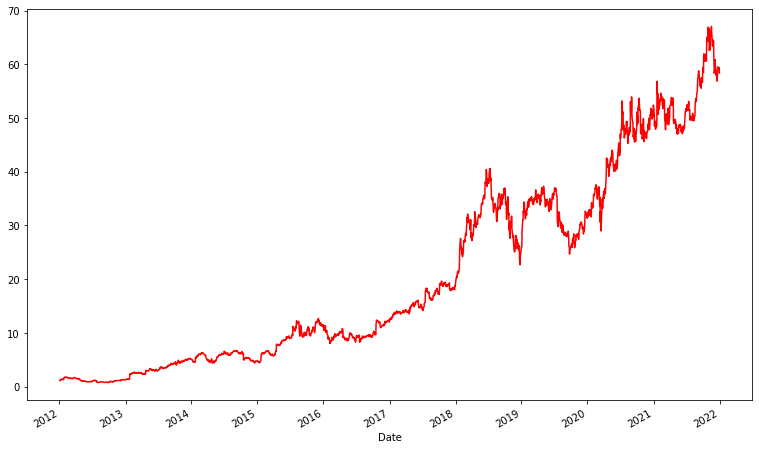

In [22]:
netflix["cum_return"].plot(figsize=(13,8), c='r')